<a href="https://colab.research.google.com/github/dkarakost/MBE_project/blob/Dimitrios/fruit_detectionD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

if torch.__version__ != '2.5.1+cu124':
    !pip install torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124 -U --quiet
    print("PyTorch version updated to 2.5.1.")
else:
    print("PyTorch is already at the correct version (2.5.1).")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install d2l==1.0.3 --quiet
!pip install scipy --quiet
!pip install torchmetrics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

`Now restart the runtime for the pytorch version change to take effect.`

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FHGSSh.png&f=1&nofb=1&ipt=3138d8a64cabb6532ff6bd6bd61aede311aec0aaa97fddc911980eee8da014b8&ipo=images" width=800></center>

In [ ]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision.transforms import ToPILImage
from torch import nn
from torch.nn import functional as F
from PIL import ImageFile, Image
import matplotlib.pyplot as plt
from object_detection_utils import ResizeWithBBox, plot_bbox, plot_grid, box_xyxy_to_cxcywh, box_xywh_to_xyxy
import random
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download the dataset
First, let's download the dataset. It consists of images of plant, bounding box annotations, and leaf counts annotations.

In [ ]:
!git clone https://git.wur.nl/abe-datasets/education/fruit-detection-challenge.git

Cloning into 'fruit-detection-challenge'...
remote: Enumerating objects: 2010, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2010 (delta 2), reused 0 (delta 0), pack-reused 2004 (from 1)
Receiving objects: 100% (2010/2010), 255.89 MiB | 15.16 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (1958/1958), done.


## The COCO dataset format

The labels for this detection dataset are stored using the COCO JSON format. COCO JSON is a data format used for object detection, segmentation, and keypoint annotation in images. It includes metadata like image paths, annotations, categories, and licenses, typically structured into keys such as "images," "annotations," "categories," and more.

Example structure:
```json
{
  "images": [
    {
      "id": 1,
      "width": 640,
      "height": 480,
      "file_name": "image1.jpg",
      "license": 1,
      "date_captured": "2023-10-01"
    }
  ],
  "annotations": [
    {
      "id": 1,
      "image_id": 1,
      "category_id": 1,
      "bbox": [50, 70, 80, 60],
      "area": 4800,
      "segmentation": [[121.39,215.89,...]],
      "iscrowd": 0
    }
  ],
  "categories": [
    {
      "id": 1,
      "name": "cat",
      "supercategory": "animal"
    },
    {
      "id": 2,
      "name": "dog",
      "supercategory": "animal"
    }
  ]
}
```

Let's open the `train.json` file and explore it:

In [ ]:
import json

json_path = "fruit-detection-challenge/detection/annotations/train.json"

with open(json_path, 'r') as f:
    data = json.load(f)

print(data.keys())
print(f"Number of images: {len(data['images'])}")
print(f"Number of annotations: {len(data['annotations'])}")
print(f"Number of categories: {len(data['categories'])}")
print(f"Categories: {data['categories']}")
print(f"Example image: {data['images'][0]}")
print(f"Example annotation: {data['annotations'][0]}")

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
Number of images: 218
Number of annotations: 1603
Number of categories: 4
Categories: [{'id': 1, 'name': 'apple', 'supercategory': ''}, {'id': 2, 'name': 'banana', 'supercategory': ''}, {'id': 3, 'name': 'orange', 'supercategory': ''}, {'id': 4, 'name': 'pear', 'supercategory': ''}]
Example image: {'id': 1, 'file_name': 'scene 1_color_001.png', 'width': 1280, 'height': 720, 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': ''}
Example annotation: {'id': 1, 'image_id': 1, 'category_id': 2, 'bbox': [463.0, 197.0, 294.0, 282.0], 'area': 25736.5, 'iscrowd': 0, 'ignore': 0, 'segmentation': [[702.0, 200.0, 691.0, 197.0, 681.0, 198.0, 673.0, 206.0, 666.0, 223.0, 667.0, 233.0, 672.0, 240.0, 675.0, 242.0, 686.0, 243.0, 696.0, 254.0, 703.0, 268.0, 706.0, 280.0, 706.0, 288.0, 704.0, 293.0, 699.0, 300.0, 681.0, 338.0, 669.0, 354.0, 657.0, 365.0, 635.0, 380.0, 596.0, 398.0, 553.0, 410.0, 522.0, 416.0, 494.0, 429.0

In [ ]:
import os
import random
from PIL import Image
from object_detection_utils import plot_bbox

json_path = "fruit-detection-challenge/detection/annotations/train.json"
image_folder = "fruit-detection-challenge/detection/train/"

with open(json_path, 'r') as f:
    data = json.load(f)

images = data['images']
random_image_info = random.choice(images) # Select a random image from the images list in JSON
image_id = random_image_info['id']
image_path = os.path.join(image_folder, random_image_info['file_name'])
print(f"Selected image: {image_path}")

img = Image.open(image_path)

boxes = []
labels = []

for annotation in data['annotations']:
    if annotation['image_id'] == image_id:
        bbox = annotation['bbox']
        x, y, w, h = bbox  # COCO box format is [x, y, width, height]
        center_x = x + w / 2.0
        center_y = y + h / 2.0
        boxes.append((center_x, center_y, w, h))
        labels.append(annotation['category_id'] - 1) # COCO category IDs start from 1, so we subtract 1 to make it zero-indexed

print(f"Boxes: {boxes}")
print(f"Labels: {labels}")

img_with_bboxes = plot_bbox(img.copy(), boxes, labels)
img_with_bboxes.show()

Selected image: fruit-detection-challenge/detection/train/scene 2_color_010.png
Boxes: [(630.5, 529.0, 173.0, 174.0), (608.5, 380.5, 301.0, 185.0), (997.0, 434.0, 158.0, 144.0), (613.0, 333.0, 142.0, 134.0), (813.5, 374.5, 113.0, 185.0), (1030.0, 653.0, 204.0, 132.0)]
Labels: [0, 1, 2, 2, 3, 0]


Let's explore the labels for the two-step method.

In [ ]:
json_path = "fruit-detection-challenge/detection/annotations/train_one_class.json"

with open(json_path, 'r') as f:
    data = json.load(f)

print(data.keys())
print(f"Number of images: {len(data['images'])}")
print(f"Number of annotations: {len(data['annotations'])}")
print(f"Number of categories: {len(data['categories'])}")
print(f"Categories: {data['categories']}")
print(f"Example image: {data['images'][0]}")
print(f"Example annotation: {data['annotations'][0]}")

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
Number of images: 218
Number of annotations: 1603
Number of categories: 1
Categories: [{'id': 1, 'name': 'fruit', 'supercategory': ''}]
Example image: {'id': 1, 'file_name': 'scene 1_color_001.png', 'width': 1280, 'height': 720, 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': ''}
Example annotation: {'id': 1, 'image_id': 1, 'category_id': 1, 'bbox': [463.0, 197.0, 294.0, 282.0], 'area': 25736.5, 'iscrowd': 0, 'ignore': 0, 'segmentation': [[702.0, 200.0, 691.0, 197.0, 681.0, 198.0, 673.0, 206.0, 666.0, 223.0, 667.0, 233.0, 672.0, 240.0, 675.0, 242.0, 686.0, 243.0, 696.0, 254.0, 703.0, 268.0, 706.0, 280.0, 706.0, 288.0, 704.0, 293.0, 699.0, 300.0, 681.0, 338.0, 669.0, 354.0, 657.0, 365.0, 635.0, 380.0, 596.0, 398.0, 553.0, 410.0, 522.0, 416.0, 494.0, 429.0, 487.0, 431.0, 477.0, 431.0, 468.0, 434.0, 465.0, 439.0, 463.0, 454.0, 467.0, 459.0, 491.0, 471.0, 506.0, 476.0, 522.0, 479.0, 562.0, 478.0, 595.0,

In [ ]:
json_path = "fruit-detection-challenge/detection/annotations/train_one_class.json"
image_folder = "fruit-detection-challenge/detection/train/"

with open(json_path, 'r') as f:
    data = json.load(f)

images = data['images']
random_image_info = random.choice(images) # Select a random image from the images list in JSON
image_id = random_image_info['id']
image_path = os.path.join(image_folder, random_image_info['file_name'])
print(f"Selected image: {image_path}")

img = Image.open(image_path)

boxes = []
labels = []

for annotation in data['annotations']:
    if annotation['image_id'] == image_id:
        bbox = annotation['bbox']
        x, y, w, h = bbox  # COCO box format is [x, y, width, height]
        center_x = x + w / 2.0
        center_y = y + h / 2.0
        boxes.append((center_x, center_y, w, h))
        labels.append(annotation['category_id'] - 1) # COCO category IDs start from 1, so we subtract 1 to make it zero-indexed

print(f"Boxes: {boxes}")
print(f"Labels: {labels}")

img_with_bboxes = plot_bbox(img.copy(), boxes, labels)
img_with_bboxes.show()

Selected image: fruit-detection-challenge/detection/train/scene 4_color_075.png
Boxes: [(931.0, 273.0, 268.0, 280.0), (535.0, 587.5, 282.0, 155.0), (685.0, 382.0, 120.0, 124.0), (534.5, 430.0, 133.0, 124.0), (775.5, 323.0, 123.0, 124.0), (510.5, 354.5, 109.0, 97.0), (589.0, 321.5, 100.0, 99.0)]
Labels: [0, 0, 0, 0, 0, 0, 0]


# The `Dataset` class from COCO json data
Now, let's create a dataset customized to our data.
We will call it `FruitDetectionDataset`. You need to define three methods (as you should aready know): the constructor `__init__`, `__get_item__` and `__len__`.

In [ ]:
from ctypes import resize
import json
import os
import torch
# TODO: add needed imports

class FruitDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, json_path, img_folder, img_size, transforms=None):
        """
        Constructor of the FruitDetectionDataset
        :param json_path: Path to the COCO JSON file
        :param img_folder: Folder containing the images
        :param img_size: Size to resize the images
        :param transforms: List of transformations to be applied to the data
        """
        self.img_folder = img_folder
        self.transforms = transforms
        self.resize = ResizeWithBBox(img_size)

        with open(json_path, 'r') as f:
            coco_data = json.load(f)

        # TODO: Extract image info and annotations
        self.images = coco_data['images']
        self.annotations = coco_data['annotations']
        self.categories = {cat['id']: cat['name'] for cat in coco_data['categories']}

        # Mapping from category ID to category index
        # This creates a zero-based index
        self.category_id_to_index = {category['id']: idx for idx, category in enumerate(self.categories)}

        # Mapping from image ID to annotations
        self.img_id_to_annotations = {}
        for annotation in self.annotations:
            img_id = annotation['image_id']
            if img_id not in self.img_id_to_annotations:
                self.img_id_to_annotations[img_id] = []
            self.img_id_to_annotations[img_id].append(annotation)

        # Create a list of image paths
        self.img_files = [os.path.join(img_folder, img['file_name']) for img in self.images]

    def __getitem__(self, idx):
        # TODO Get image path and annotations
        img_info = self.images[idx]
        img_filename = img_info['file_name']
        img_id = img_info['id']
        img_path = os.path.join(self.img_folder, img_filename)
        # Get annotations for the image
        annotations = self.img_id_to_annotations.get(img_id, [])

        # Load image
        img = Image.open(img_path).convert("RGB") # TODO PIL Image format

        # Extract bounding boxes and labels
        bboxes = []
        labels = []
        for annotation in annotations:
            x, y, width, height = annotation['bbox']
            bboxes.append([x, y, width, height])
            category_id = annotation['category_id']
            labels.append(self.category_id_to_index[category_id])

        bboxes = torch.tensor(bboxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        if len(bboxes.shape) == 1:
            bboxes = bboxes.unsqueeze(0)

        # TODO: Resize image and boxes
        img, bboxes = self.resize(img, boxes)

        # TODO: Convert boxes to center x, center y, width, height format
        cxcywh_boxes = []
        for box in boxes:
          x, y, w, h = box
          center_x = x + w / 2.0
          center_y = y + h / 2.0
          cxcywh_boxes.append([center_x], center_y, w, h)

        bboxes = torch.tensor(cxcywh_boxes, dtype=torch.float32)

        # Apply other transforms
        if self.transforms:
            img = self.transforms(img)

        # TODO Add illegal boxes if needed
        illegal_needed = 3 - len(boxes)
        illegal_labels = torch.zeros((illegal_needed, 4), dtype=torch.float32)
        illegal_boxes = torch.ones((illegal_needed,), dtype=torch.int64) * -1

        return img, {
            "labels": torch.cat((labels, illegal_labels)),
            "boxes": torch.cat((bboxes, illegal_boxes), axis=0),
        }

    def __len__(self): # TODO
        return len(self.images)


This dataset should allow you to develop your object detection algorithm for both methods (two-stage with one class and single stage with 4 classes)

## Two-step approach
The two-step approach consists of a generic fruit detector plus a fruit classifier. You can use `FruitDetectionDataset` to train your generic fruit detector. However, we need a different dataset for your classifier. To help you, we've already cropped all the fruits from the training and validation images and store them in a folder. Let's explore it.

In [ ]:
import torchvision


data_dir = "fruit-detection-challenge/classification"

train_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train'))
val_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'val'))

In [ ]:
train_imgs.classes

['apple', 'banana', 'orange', 'pear']

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

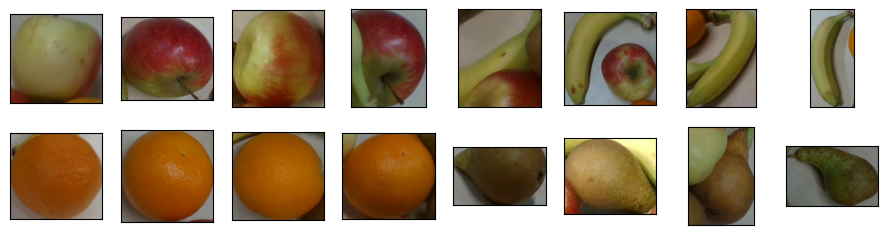

In [ ]:
from d2l import torch as d2l

class_names = train_imgs.classes
images = []

for i in range(len(train_imgs.classes)):
    class_idx = i % len(class_names)
    class_name = class_names[class_idx]
    class_images = [img for img, label in train_imgs if label == class_idx]
    for i in range(4): # Select 4 random images from the class
        images.append(random.choice(class_images))

d2l.show_images(images, 2, 8, scale=1.4)


## Creating submission `.txt` file
The submission format should be a txt file as follow where predicted boxes are presented as `image_filename, cx, cy, w, h, class_id, confidence. This is an example:

```
color_001.png, 0.9385692477226257, 0.12406756728887558, 0.15019071102142334, 0.22750574350357056, 3, 0.9989498257637024
color_002.png, 0.699505090713501, 0.38808369636535645, 0.25795409083366394, 0.4329442083835602, 2, 0.9999927282333374
color_002.png, 0.8748611807823181, 0.6965410709381104, 0.15483522415161133, 0.2767787575721741, 3, 0.9996340274810791
color_003.png, 0.5620995163917542, 0.36693891882896423, 0.3271831274032593, 0.43740174174308777, 2, 0.9999911785125732
color_004.png, 0.7048399448394775, 0.5529986619949341, 0.19585376977920532, 0.29669857025146484, 3, 0.9999991655349731
color_004.png, 0.6807190775871277, 0.18781284987926483, 0.18665297329425812, 0.3028806447982788, 3, 0.9999967813491821
color_004.png, 0.8595101237297058, 0.360429972410202, 0.2043967992067337, 0.3125438988208771, 3, 0.9999872446060181
color_005.png, 0.5389502048492432, 0.5513347387313843, 0.18025022745132446, 0.3195890188217163, 3, 0.9999912977218628
color_005.png, 0.5121865272521973, 0.2852896749973297, 0.1954585462808609, 0.274965763092041, 3, 0.9999532699584961
color_006.png, 0.25715094804763794, 0.9217860102653503, 0.17427219450473785, 0.1739407777786255, 2, 0.9999980926513672
````

We provide you some starting code for this in the next cell.


In [ ]:
from object_detection_utils import predict

def predict_test_submission(model, test_dataset, output_txt_path, img_size, score_threshold=0.3, nms_threshold=0.3):
    """
    Predict bounding boxes for all images in the test dataset and save to a text file:
      file_name, cx, cy, w, h, label, score
    """
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    with open(output_txt_path, "w") as out_file:
        for i in range(len(test_dataset)):
            img_path = test_dataset.img_files[i]
            pil_img = Image.open(img_path).convert("RGB")
            tensor_img = ...
            boxes, scores, top_class = predict(model, tensor_img, score_threshold, nms_threshold)
            # Write results
            file_name = os.path.basename(img_path)
            for box, lbl, sc in zip(boxes, top_class, scores):
                box = box / img_size
                cx, cy, w, h = box.tolist()
                out_file.write(f"{file_name}, {cx}, {cy}, {w}, {h}, {lbl.item()+1}, {sc.item()}\n") # submission expects 1-based indexing for labels

    print(f"Predictions saved to {output_txt_path}")

## Testing your code before submitting using the validation set
We provide you with the validation set in the same `.txt` format used in the submission file. Check it here `fruit-detection-challenge/detection/annotations/val.txt`.

We also provide you with the code that the submission server uses to calculate AP performance. You can find it in `object_detection_utils.py` with name `FileBasedAPCalculator`. Let's see how to use it.

Let's first create a noisy version of our ground truth `val.txt` for this demonstration.

In [ ]:
import numpy as np

def add_noise_to_box(box_coords, noise_factor=0.1):
    noisy_box = []
    for coord in box_coords:
        noisy_coord = np.random.normal(loc=coord, scale=noise_factor * coord)
        noisy_box.append(max(0, min(noisy_coord, 1)))  # Ensure the values are within [0, 1]
    return noisy_box

def remove_random_predictions(predictions, removal_fraction=0.2):
    num_predictions = len(predictions)
    indices_to_remove = np.random.choice(num_predictions, size=int(removal_fraction * num_predictions), replace=False)
    remaining_predictions = [pred for i, pred in enumerate(predictions) if i not in indices_to_remove]
    return remaining_predictions

def process_predictions(file_path):
    predictions = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            image_name = parts[0]
            box_coords = list(map(float, parts[1:5]))
            class_id = int(parts[5])
            confidence = 1.0
            predictions.append((image_name, *box_coords, class_id, confidence))

    noisy_predictions = []
    for pred in predictions:
        image_name, x_center, y_center, width, height, class_id, conf = pred
        noisy_box = add_noise_to_box([x_center, y_center, width, height], 0.05)
        noisy_predictions.append((image_name, *noisy_box, class_id, conf))

    remaining_predictions = remove_random_predictions(noisy_predictions, 0.1)

    return remaining_predictions

def save_processed_predictions(predictions, output_file_path):
    with open(output_file_path, 'w') as f:
        for pred in predictions:
            line = ','.join(map(str, pred))
            f.write(line + '\n')



In [ ]:
from object_detection_utils import FileBasedAPCalculator

val_gt = "fruit-detection-challenge/detection/annotations/val.txt"

noisy_val_gt = 'processed_predictions.txt'

predictions = process_predictions(val_gt)
save_processed_predictions(predictions, noisy_val_gt)


ap_calculator = FileBasedAPCalculator(
    val_gt,
    noisy_val_gt,
)
ap = ap_calculator.calculate_map()
print(f"AP: {ap['map'].item():.4f}")
print(f"AP@50: {ap['map_50'].item():.4f}")
print(f"AP@75: {ap['map_75'].item():.4f}")
print(f"AP (small): {ap['map_small'].item():.4f}")
print(f"AP (medium): {ap['map_medium'].item():.4f}")
print(f"AP (large): {ap['map_large'].item():.4f}")
print(f"AR@1: {ap['mar_1'].item():.4f}")
print(f"AR@10: {ap['mar_10'].item():.4f}")
print(f"AR@100: {ap['mar_100'].item():.4f}")
print(f"AR (small): {ap['mar_small'].item():.4f}")
print(f"AR (medium): {ap['mar_medium'].item():.4f}")
print(f"AR (large): {ap['mar_large'].item():.4f}")
print(f"AP per class: {ap['map_per_class']}")
print(f"AR@100 per class: {ap['mar_100_per_class']}")
print(f"Classes: {ap['classes']}")

AP: 0.1934
AP@50: 0.6149
AP@75: 0.0746
AP (small): 0.1934
AP (medium): -1.0000
AP (large): -1.0000
AR@1: 0.1529
AR@10: 0.2916
AR@100: 0.2916
AR (small): 0.2916
AR (medium): -1.0000
AR (large): -1.0000
AP per class: tensor([0.2302, 0.2501, 0.1040, 0.1892])
AR@100 per class: tensor([0.3200, 0.3529, 0.2333, 0.2600])
Classes: tensor([1, 2, 3, 4], dtype=torch.int32)


**Now you can start with the challenge!**

In [1]:
# Paths
json_path = "fruit-detection-challenge/detection/annotations/train_one_class.json"
image_folder = "fruit-detection-challenge/detection/train/"

# Create dataset and dataloader
dataset = FruitDetectionDataset(json_path, image_folder, img_size=(224, 224), transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=lambda x: x)

# Check a sample batch
sample_batch = next(iter(dataloader))
print(f"Image batch shape: {sample_batch[0]['image'].shape}")
print(f"Number of boxes in first image: {sample_batch[0]['boxes'].shape}")

NameError: name 'FruitDetectionDataset' is not defined